In [1]:
import pandas as pd
import numpy as np
from ann_funcs import *

In [2]:
df = pd.read_csv("ccpp.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df=(df-df.min())/(df.max()-df.min())
df.head()

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464


In [4]:
df = df.dropna().reset_index(drop=True)

In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [6]:
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
y_train = y_train.reshape(1, -1)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)
y_test = y_test.reshape(1, -1)

In [7]:
print("In training set:")
print("No. of features: ", x_train.shape[0])
print("No. of samples: ", x_train.shape[1])

In training set:
No. of features:  4
No. of samples:  7176


In [8]:
layers_dims = [4, 20, 50, 20, 5, 1]

Cost after iteration 0: 0.169625
Cost after iteration 100: 0.005434
Cost after iteration 200: 0.004202
Cost after iteration 300: 0.003727
Cost after iteration 400: 0.003421
Cost after iteration 500: 0.003209
Cost after iteration 600: 0.003057
Cost after iteration 700: 0.002945
Cost after iteration 800: 0.002860
Cost after iteration 900: 0.002793


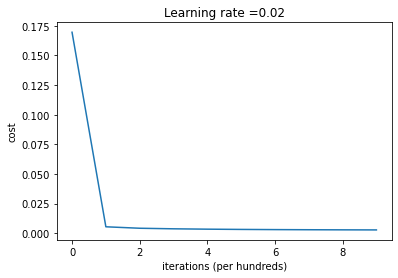

In [9]:
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.02, num_iterations = 1000, print_cost = True, cost_func = "mse", activation = "tanh", he_init=True)

In [10]:
mse = test_regression(x_test, y_test, parameters, activation = "tanh", last_activation = "tanh")

MSE:  0.0027467134457870323


In [11]:
sample_x = x_test[:, 10]
sample_x = sample_x.reshape(sample_x.shape[0], 1)
sample_output, cache = L_model_forward(sample_x, parameters, "tanh", "tanh")
print("Actual: ", y_test[:, 100][0])
print("Predicted: ", sample_output[0][0])

Actual:  0.6270198675496693
Predicted:  0.7526790181992286


In [12]:
output, cache = L_model_forward(x_test, parameters, "tanh", "tanh")
df2 = pd.DataFrame()
df2['predicted'] = output[0].T.tolist()
df2['actual'] = y_test[0].T.tolist()

In [13]:
df2

,predicted,actual
0,0.440036,0.512583
1,0.459241,0.569934
2,0.211973,0.198808
3,0.768481,0.848344
4,0.643730,0.705828
...,...,...
2387,0.248783,0.202649
2388,0.345215,0.313245
2389,0.451559,0.585166
2390,0.157236,0.088344


In [14]:
preds, cache = L_model_forward(x_test, parameters, activation="tanh", last_activation="tanh")

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test.T, preds.T)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.8944945407116927


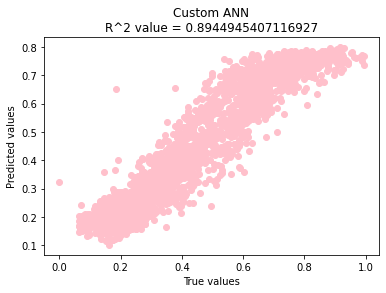

In [33]:
plt.scatter(y_test.T,preds.T,color='pink')
plt.xlabel("True values")
plt.ylabel("Predicted values")
txt = "R^2 value = " + str(r2)
plt.title("Custom ANN\n" + txt)
# plt.text(0, 0.6, txt, fontsize = 10)
plt.show()

In [28]:
data = np.hstack((y_test.T, preds.T))
result = pd.DataFrame(data=data,columns=['true','pred'])
result.to_csv("result.csv")

array([[0.51258278, 0.44003639],
       [0.56993377, 0.45924065],
       [0.19880795, 0.21197302],
       ...,
       [0.58516556, 0.45155911],
       [0.08834437, 0.15723616],
       [0.26370861, 0.24301311]])